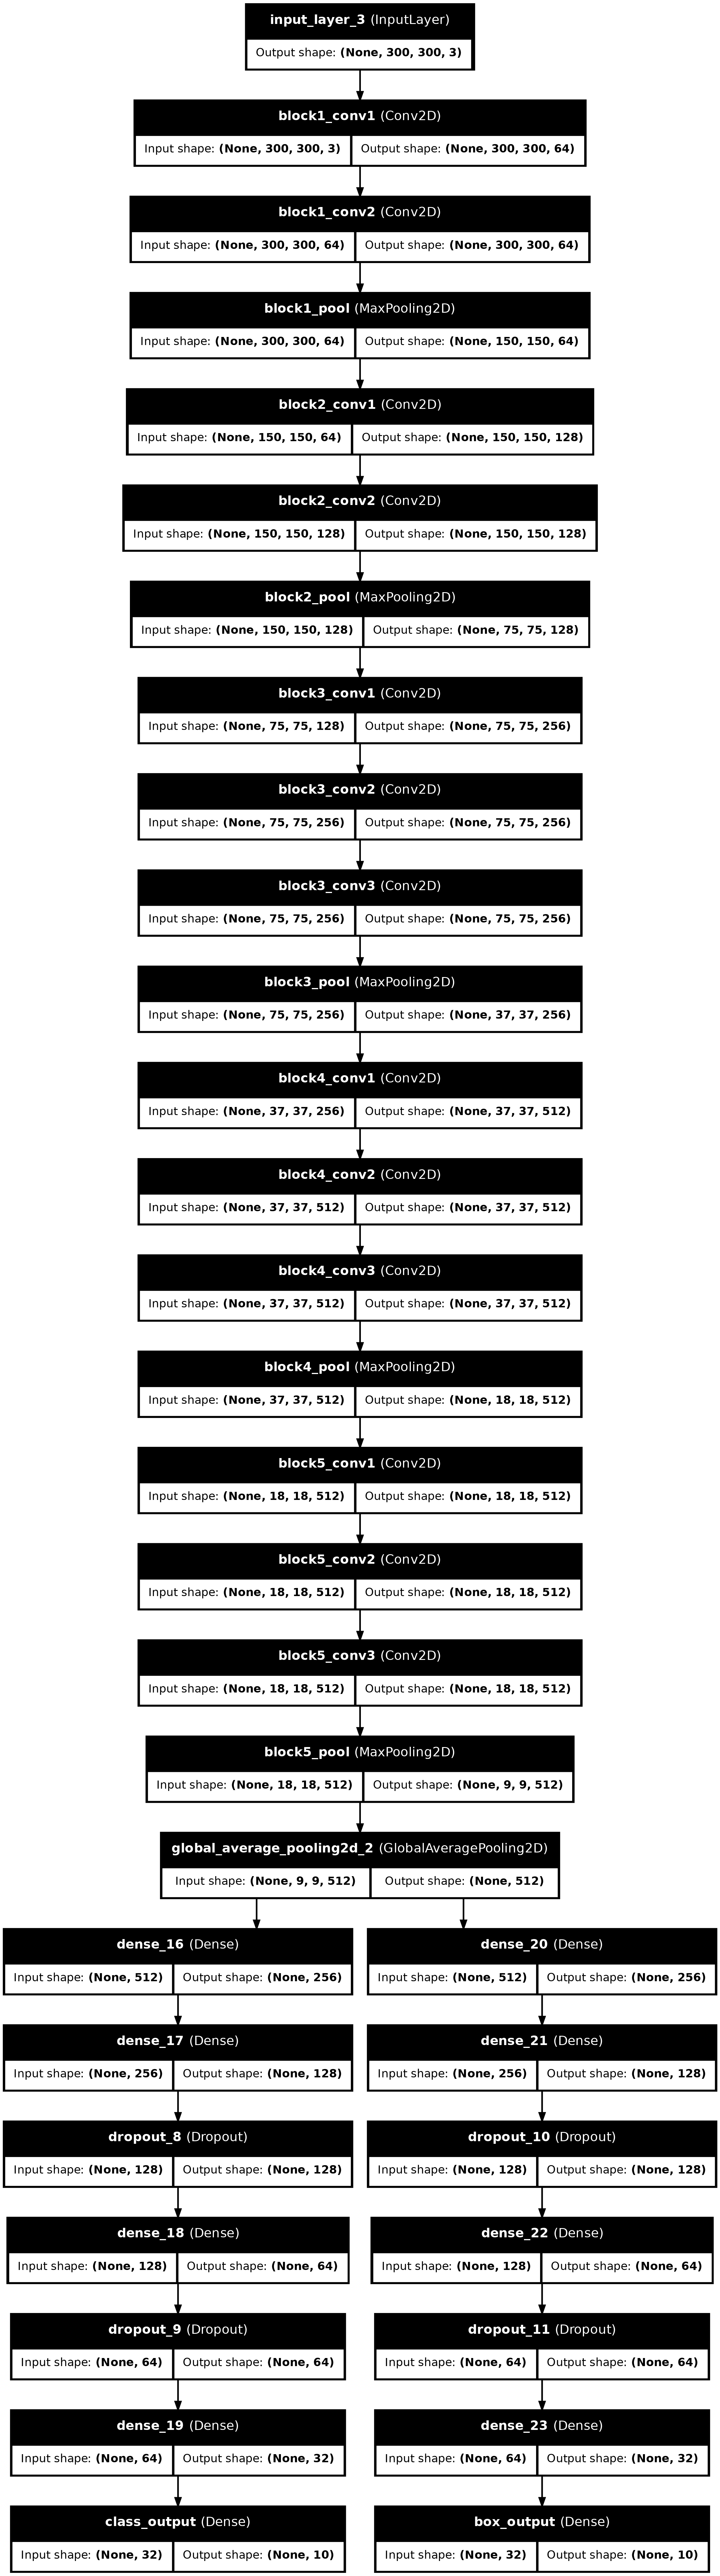

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Define image size
image_size = 300

# Load the VGG model without the top layers
VGG = VGG16(
    input_tensor=Input(shape=(image_size, image_size, 3)),
    weights='imagenet',
    include_top=False
)

# Function to create the model
def create_model(no_of_classes):
    VGG.trainable = False  # Freeze VGG layers

    # Take the output feature maps from VGG
    base_model_output = VGG.output

    # Global Average Pooling layer
    flatten_output = GlobalAveragePooling2D()(base_model_output)

    # Classification head
    class_prediction = Dense(256, activation='relu')(flatten_output)
    class_prediction = Dense(128, activation='relu')(class_prediction)
    class_prediction = Dropout(0.2)(class_prediction)
    class_prediction = Dense(64, activation='relu')(class_prediction)
    class_prediction = Dropout(0.2)(class_prediction)
    class_prediction = Dense(32, activation='relu')(class_prediction)
    class_prediction = Dense(no_of_classes, activation='softmax', name='class_output')(class_prediction)

    # Localization head
    box_output = Dense(256, activation='relu')(flatten_output)
    box_output = Dense(128, activation='relu')(box_output)
    box_output = Dropout(0.2)(box_output)
    box_output = Dense(64, activation='relu')(box_output)
    box_output = Dropout(0.2)(box_output)
    box_output = Dense(32, activation='relu')(box_output)
    box_output = Dense(no_of_classes, activation='sigmoid', name='box_output')(box_output)

    # Combine the heads into a single model
    model = Model(inputs=VGG.input, outputs=[class_prediction, box_output])

    return model

# Create the model for 10 classes
model = create_model(10)

# Plot the model structure
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
